# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import joblib

# Data Loading

In [2]:
data = pd.read_csv('/content/Crop_recommendation.csv')
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


Dataset tersebut adalah data yang berisi informasi tentang parameter untuk memprediksi jenis tanaman yang cocok ditanam dilahan pertanian, yang mana memililiki jumlah data 2200 baris dan 8 kolom. Berdasarkan informasi dari Kaggle, variabel-variabel pada dataset adalah sebagai berikut:

* N : Merepresentasikan rasio kandungan Nitrogen dalam tanah
* P : Merepresentasikan rasio kandungan Fosfor dalam tanah
* K : Merepresentasikan rasio kandungan Kalium dalam tanah
* temperature : Merepresentasikan suhu dalam derajat Celcius
* humidity : Merepresentasikan kelembaban relatif dalam %
* ph : Merepresentasikan nilai tanah
* rainfall : Merepresentasikan curah hujan dalam mm


# Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
null = data.isnull().sum()
print(null)

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [5]:
duplicate = data.duplicated().sum()
print(duplicate)

0


Pada dataset untuk tipe datanya sudah sesuai, tidak memiliki missing value, dan tidak memiliki data yang duplikat.

In [6]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
N = (data.N == 0).sum()
print("Jumlah nilai 0 pada kolom N :", N)

Jumlah nilai 0 pada kolom N : 27


In [8]:
data = data[data['N'] != 0]
clean_N = (data.N == 0).sum()
print("Jumlah nilai 0 pada kolom N :", clean_N)

Jumlah nilai 0 pada kolom N : 0


             jumlah sampel  persentase
label                                 
rice                   100         4.6
maize                  100         4.6
chickpea               100         4.6
watermelon             100         4.6
banana                 100         4.6
blackgram              100         4.6
cotton                 100         4.6
jute                   100         4.6
papaya                 100         4.6
coffee                 100         4.6
muskmelon              100         4.6
mungbean                99         4.6
pigeonpeas              99         4.6
mothbeans               99         4.6
grapes                  99         4.6
kidneybeans             98         4.5
pomegranate             97         4.5
mango                   97         4.5
apple                   97         4.5
lentil                  96         4.4
orange                  96         4.4
coconut                 96         4.4


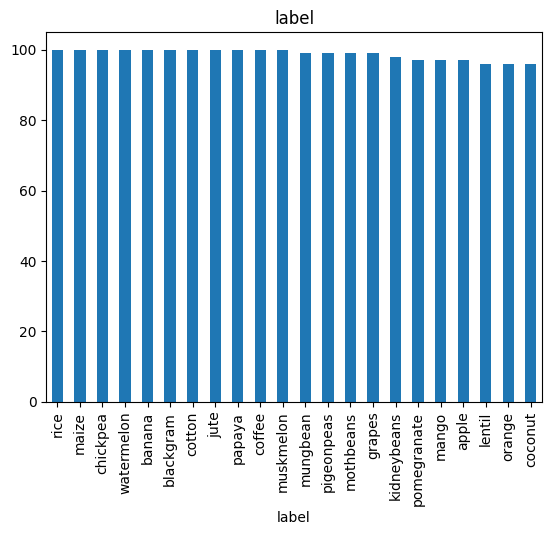

In [9]:
count = data['label'].value_counts()
percent = 100*data['label'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title='label');

 Diketahui, pada variabel N terdapat nilai minimum 0, yang mana kandungan Nitrogen dalam tanah tidak mungkin bernilai 0. kemudian, saat diperiksa memiliki nilai 0 yang berjumlah 27, yang mana perlu dihapus pada data tersebut.

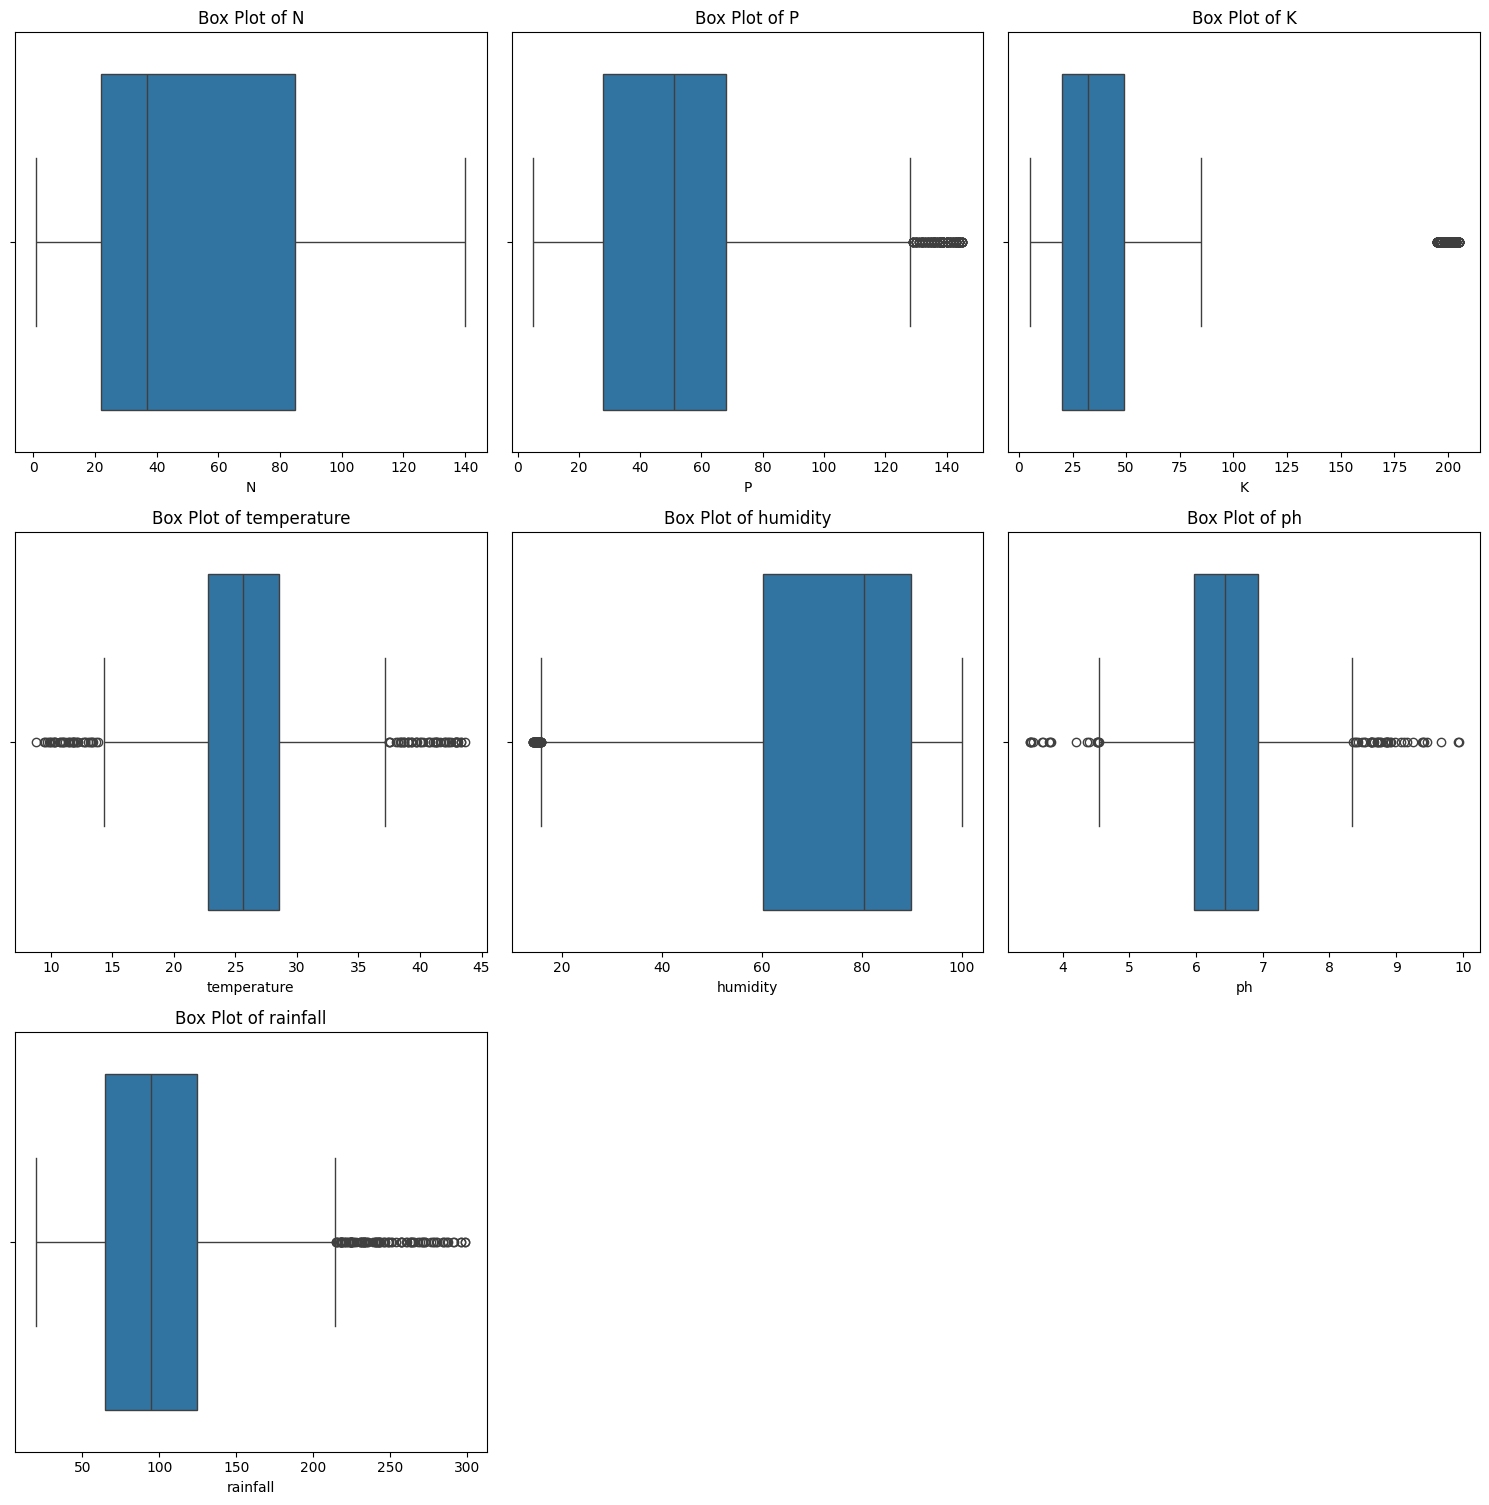

In [10]:
num_features = data.select_dtypes(include='number')

num_cols = 3
num_rows = (len(num_features) + num_cols - 1)

plt.figure(figsize=(15, 5 * num_rows))

for i, feature in enumerate(num_features):
  plt.subplot(num_rows, num_cols, i + 1)
  sns.boxplot(x=data[feature])
  plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

Pada kolom numeric pada setiap variabel memiliki outlier yang cukup banyak, namun hanya variabel N yang tidak memiliki outlier.

# Data Preperation

In [11]:
numeric_cols = data.select_dtypes(include='number').columns

Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

filter_outliers = ~((data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

data = data[filter_outliers]

data.shape

(1740, 8)

pada tahap ini menghapus outlier pada kolom numeric, yang mana jumlah dataset setelah dibersihkan menjadi 1740 baris.

In [12]:
label = {
    "rice": "padi",
    "maize": "jagung",
    "chickpea": "kacang chickpea",
    "watermelon": "semangka",
    "banana": "pisang",
    "blackgram": "kacang hitam",
    "cotton": "kapas",
    "jute": "jute",
    "papaya": "pepaya",
    "coffee": "kopi",
    "muskmelon": "melon",
    "mungbean": "kacang hijau",
    "pigeonpeas": "kacang polong",
    "mothbeans": "kacang moth",
    "grapes": "anggur",
    "kidneybeans": "kacang merah",
    "pomegranate": "delima",
    "mango": "mangga",
    "apple": "apel",
    "lentil": "lentil",
    "orange": "jeruk",
    "coconut": "kelapa"
}

data['label'] = [label[item] for item in data['label']]

<ipython-input-12-9f462d39062a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = [label[item] for item in data['label']]


Mengubah data pada kolom label menjadi bahasa indonesia

                 jumlah sampel  persentase
label                                     
jagung                     100         5.7
melon                      100         5.7
pisang                     100         5.7
kacang hitam               100         5.7
kapas                      100         5.7
jute                       100         5.7
semangka                   100         5.7
kopi                       100         5.7
kacang polong               99         5.7
kacang hijau                99         5.7
kacang merah                98         5.6
delima                      97         5.6
lentil                      96         5.5
mangga                      94         5.4
kelapa                      82         4.7
jeruk                       79         4.5
kacang moth                 58         3.3
pepaya                      54         3.1
kacang chickpea             52         3.0
padi                        32         1.8


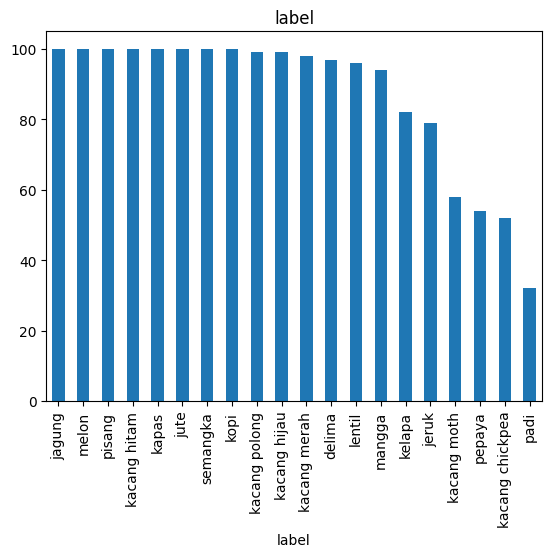

In [13]:
count = data['label'].value_counts()
percent = 100*data['label'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title='label');

Setelah menghapus outlier dan diperiksa ulang untuk jumlah sampel nya, diketahui bahwa kelas rice memiliki banyak outlier yang membuat kelas memjadi tidak seimbang, hal ini dapat membuat model menjadi bias dan mengalami overfitting.

In [14]:
X = data.drop('label', axis=1)
y = data['label']

le = LabelEncoder()
y = le.fit_transform(y)


sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Pada tahap ini membuat variabel X untuk menyimpan variabel untuk diganakan sebagai parameter untuk memprediksi dan variabel y merupakan label yang ingin diprediksi. Selanjutnya, melakukan label encoder pada variabel y untuk mengubah data categorikal pada data tersebut ke format numeric. Setelah itu, melakukan standarisasi pada variabel X, yang mana nilai pada data tersebut diubah sehingga memiliki rata-rata 0 dan deviasi standar 1, yang membantu meningkatkan performa model machine learning dengan memastikan bahwa semua fitur berkontribusi secara seimbang. Kemudian yang terakhir membagi data menjadi data latih (train) dan data uji (test), yang mana data tersebut dibagi menjadi 80% untuk latihan dan 20% untuk pengujian.

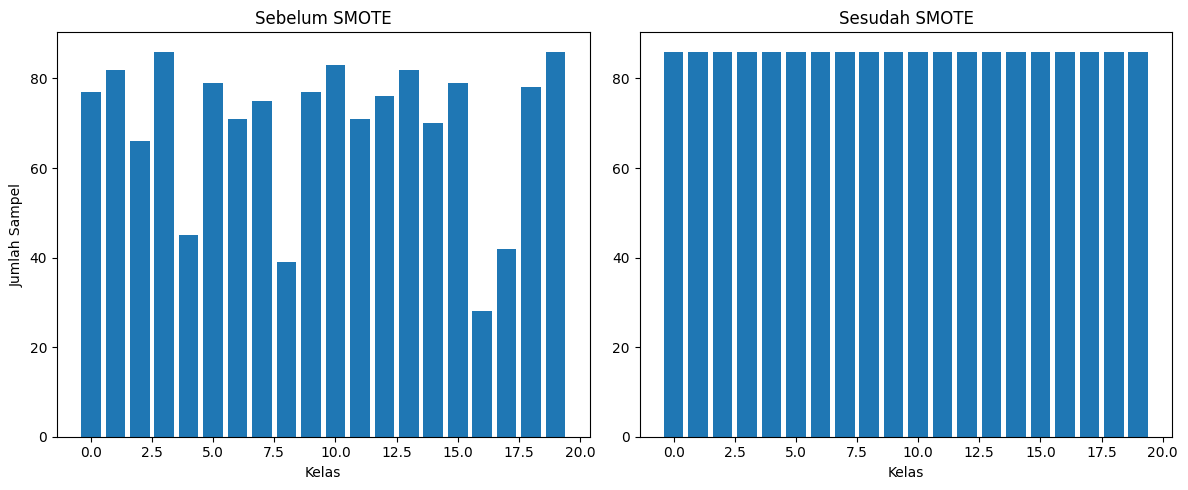

In [15]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

before = pd.Series(y_train).value_counts()
after = pd.Series(y_train_resampled).value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(before.index, before.values)
ax1.set_title('Sebelum SMOTE')
ax1.set_xlabel('Kelas')
ax1.set_ylabel('Jumlah Sampel')

ax2.bar(after.index, after.values)
ax2.set_title('Sesudah SMOTE')
ax2.set_xlabel('Kelas')

plt.tight_layout()
plt.show()

Pada tahap ini melakukan SMOTE untuk menangani ketidakseimbang kelas, Karena pada saat cleaning data, pada dataset diketahui untuk kelas rice jumlah datanya menjadi sangat berkurang. Hal ini dapat mengakibatkan model menjadi bias dan overfitting pada kelas mayoritas.

# Modeling

In [16]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

RandomForestClassifier()

# Evaluasi Model

In [17]:
pred = RF_model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
report = classification_report(y_test, pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9885057471264368
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        13
           3       0.82      1.00      0.90        14
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        23
           8       1.00      0.95      0.97        19
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        17
          11       1.00      1.00      1.00        11
          12       1.00      1.00      1.00        24
          13       0.93      1.00      0.97        14
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        21
          16       1.00     

# Save Model

In [19]:
joblib.dump(sc, 'scaler.joblib')
joblib.dump(le, 'label_encoder.joblib')
joblib.dump(RF_model, 'random_forest_model.joblib')

['random_forest_model.joblib']